<a href="https://colab.research.google.com/github/tomeelow/ames-housing-price-predictor/blob/main/housing_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import os

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [12]:
# Example: Ames Housing dataset
!kaggle datasets download -d shashanknecrothapa/ames-housing-dataset -p data

# Unzip
!unzip -o data/ames-housing-dataset.zip -d data


Dataset URL: https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset
License(s): unknown
  0% 0.00/185k [00:00<?, ?B/s]
100% 185k/185k [00:00<00:00, 523MB/s]
Archive:  data/ames-housing-dataset.zip
  inflating: data/AmesHousing.csv    


In [13]:
import pandas as pd

# Load the Ames Housing dataset into a DataFrame
df_ames = pd.read_csv('data/AmesHousing.csv')

# Display the first 5 rows of the DataFrame
display(df_ames.head())

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [14]:
df_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [15]:
df_ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [16]:
print(df_ames.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


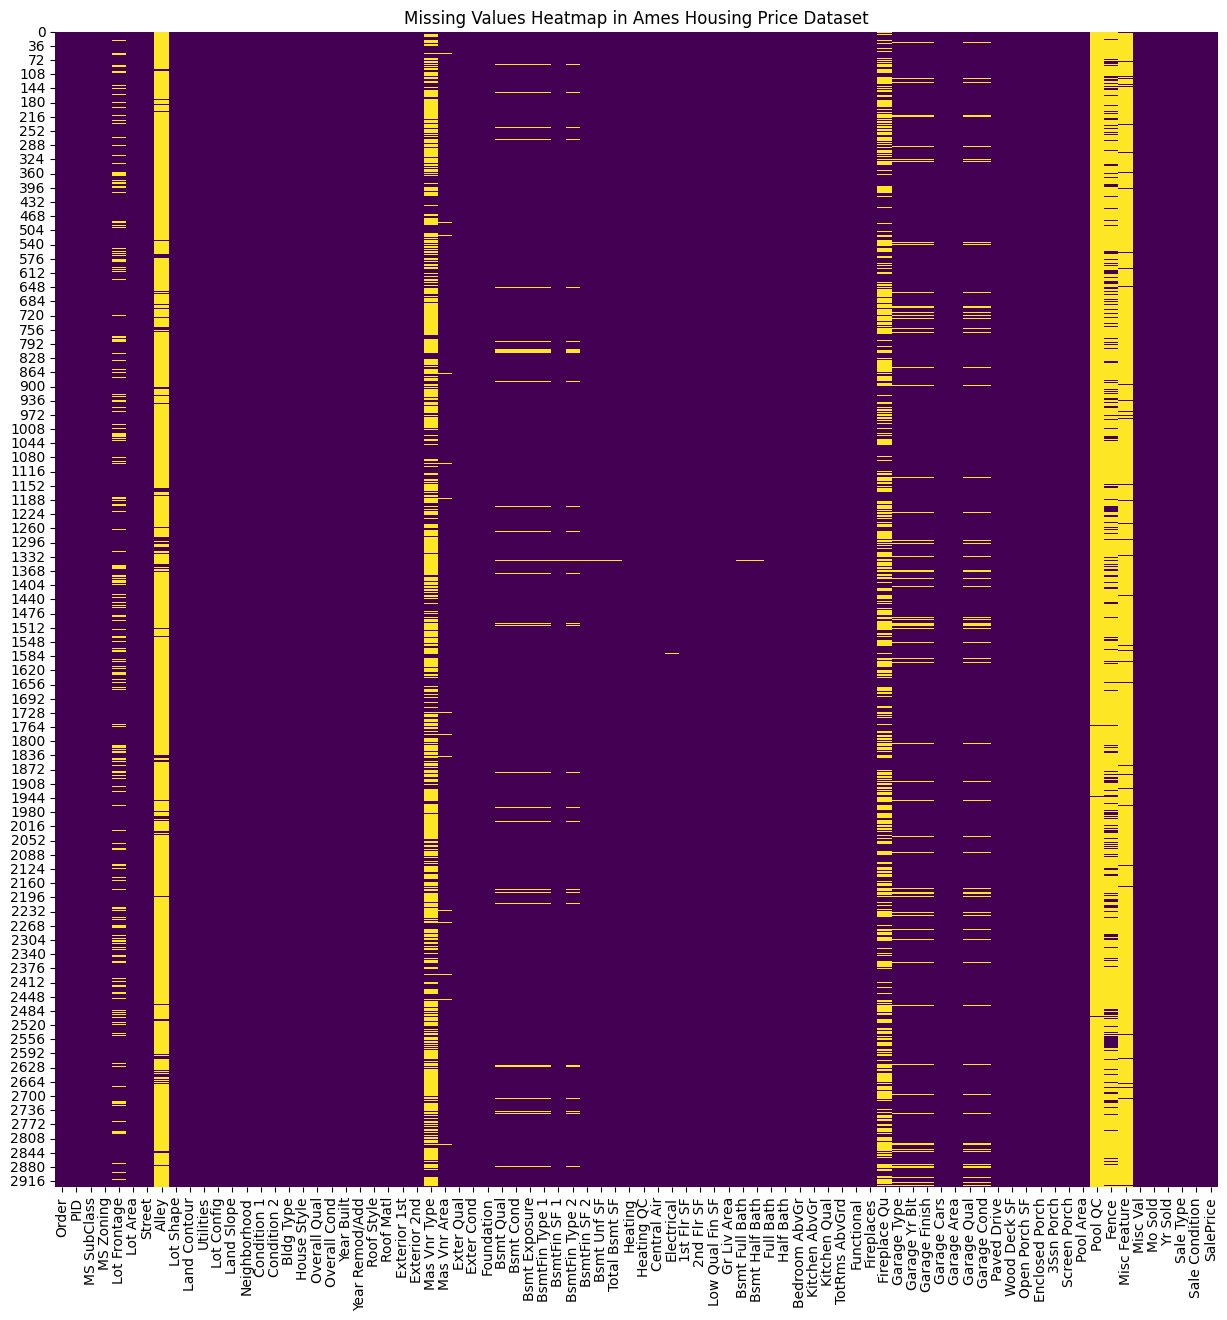

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(df_ames.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap in Ames Housing Price Dataset')
plt.show()

In [20]:
# Proposed Data Cleaning Steps:

# 1. Drop columns with excessive missing values (e.g., >80% missing)
# Calculate percentage of missing values
missing_percent = df_ames.isnull().sum() / len(df_ames) * 100

# Identify columns to drop
drop_columns = missing_percent[missing_percent > 80].index
print(f"Columns to drop due to high missing values: {list(drop_columns)}")
df_ames_cleaned = df_ames.drop(columns=drop_columns)

# 2. Impute missing values for categorical columns (where 'NaN' likely means 'None')
# Example for Basement and Garage related categorical features
for col in ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
            'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
            'Mas Vnr Type']:
    if col in df_ames_cleaned.columns:
        df_ames_cleaned[col] = df_ames_cleaned[col].fillna('None')

# 3. Impute missing values for numerical columns
# For Lot Frontage, impute with median within its neighborhood or overall median
if 'Lot Frontage' in df_ames_cleaned.columns:
    df_ames_cleaned['Lot Frontage'] = df_ames_cleaned['Lot Frontage'].fillna(df_ames_cleaned['Lot Frontage'].median())

# For Mas Vnr Area, impute with 0 (if 'None' for Mas Vnr Type) or median
if 'Mas Vnr Area' in df_ames_cleaned.columns:
    df_ames_cleaned['Mas Vnr Area'] = df_ames_cleaned['Mas Vnr Area'].fillna(0) # Assuming 0 for 'None'

# For Basement and Garage numerical features, impute with 0 (if 'None' for related categorical)
for col in ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
            'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']:
    if col in df_ames_cleaned.columns:
        df_ames_cleaned[col] = df_ames_cleaned[col].fillna(0)

# For Electrical, impute with the mode (most frequent value)
if 'Electrical' in df_ames_cleaned.columns:
    df_ames_cleaned['Electrical'] = df_ames_cleaned['Electrical'].fillna(df_ames_cleaned['Electrical'].mode()[0])

# For Garage Yr Blt, impute with Year Built or median
# A more sophisticated approach would be to impute based on 'Year Built' if Garage Type is 'None'
# For simplicity here, we'll use the median of existing garage years.
if 'Garage Yr Blt' in df_ames_cleaned.columns:
    df_ames_cleaned['Garage Yr Blt'] = df_ames_cleaned['Garage Yr Blt'].fillna(df_ames_cleaned['Garage Yr Blt'].median())

# Display remaining missing values to verify
print("\nMissing values after initial cleaning:")
print(df_ames_cleaned.isnull().sum()[df_ames_cleaned.isnull().sum() > 0])

display(df_ames_cleaned.head())

Columns to drop due to high missing values: ['Alley', 'Pool QC', 'Fence', 'Misc Feature']

Missing values after initial cleaning:
Series([], dtype: int64)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


*   **Order**: A unique ID for each record.
*   **PID**: Parcel identification number.
*   **MS SubClass**: Type of dwelling involved in the sale.
*   **MS Zoning**: General zoning classification.
*   **Lot Frontage**: Linear feet of street connected to property.
*   **Lot Area**: Lot size in square feet.
*   **Street**: Type of road access to property.
*   **Lot Shape**: General shape of property.
*   **Land Contour**: Flatness of the property.
*   **Utilities**: Type of utilities available.
*   **Lot Config**: Lot configuration.
*   **Land Slope**: Slope of property.
*   **Neighborhood**: Physical locations within Ames city limits.
*   **Condition 1**: Proximity to main road or railroad.
*   **Condition 2**: Proximity to main road or railroad (if a second is present).
*   **Bldg Type**: Type of dwelling.
*   **House Style**: Style of dwelling.
*   **Overall Qual**: Overall material and finish quality.
*   **Overall Cond**: Overall condition rating.
*   **Year Built**: Original construction date.
*   **Year Remod/Add**: Remodel date (same as construction date if no remodel or additions).
*   **Roof Style**: Type of roof.
*   **Roof Matl**: Roof material.
*   **Exterior 1st**: Exterior covering on house.
*   **Exterior 2nd**: Exterior covering on house (if more than one material).
*   **Mas Vnr Type**: Masonry veneer type.
*   **Mas Vnr Area**: Masonry veneer area in square feet.
*   **Exter Qual**: Exterior quality.
*   **Exter Cond**: Exterior condition.
*   **Foundation**: Type of foundation.
*   **Bsmt Qual**: Height of the basement.
*   **Bsmt Cond**: General condition of the basement.
*   **Bsmt Exposure**: Walkout or garden level basement walls.
*   **BsmtFin Type 1**: Quality of basement finished area 1.
*   **BsmtFin SF 1**: Type 1 finished square feet.
*   **BsmtFin Type 2**: Quality of basement finished area 2 (if present).
*   **BsmtFin SF 2**: Type 2 finished square feet.
*   **Bsmt Unf SF**: Unfinished square feet of basement area.
*   **Total Bsmt SF**: Total square feet of basement area.
*   **Heating**: Type of heating.
*   **Heating QC**: Heating quality and condition.
*   **Central Air**: Central air conditioning.
*   **Electrical**: Electrical system.
*   **1st Flr SF**: First Floor square feet.
*   **2nd Flr SF**: Second floor square feet.
*   **Low Qual Fin SF**: Low quality finished square feet (all floors).
*   **Gr Liv Area**: Above grade (ground) living area square feet.
*   **Bsmt Full Bath**: Basement full bathrooms.
*   **Bsmt Half Bath**: Basement half bathrooms.
*   **Full Bath**: Full bathrooms above grade.
*   **Half Bath**: Half baths above grade.
*   **Bedroom AbvGr**: Number of bedrooms above grade (does not include basement bedrooms).
*   **Kitchen AbvGr**: Number of kitchens above grade.
*   **Kitchen Qual**: Kitchen quality.
*   **TotRms AbvGrd**: Total rooms above grade (does not include bathrooms).
*   **Functional**: Home functionality rating.
*   **Fireplaces**: Number of fireplaces.
*   **Fireplace Qu**: Fireplace quality.
*   **Garage Type**: Garage location.
*   **Garage Yr Blt**: Year garage was built.
*   **Garage Finish**: Interior finish of the garage.
*   **Garage Cars**: Size of garage in car capacity.
*   **Garage Area**: Size of garage in square feet.
*   **Garage Qual**: Garage quality.
*   **Garage Cond**: Garage condition.
*   **Paved Drive**: Paved driveway.
*   **Wood Deck SF**: Wood deck area in square feet.
*   **Open Porch SF**: Open porch area in square feet.
*   **Enclosed Porch**: Enclosed porch area in square feet.
*   **3Ssn Porch**: Three season porch area in square feet.
*   **Screen Porch**: Screen porch area in square feet.
*   **Pool Area**: Pool area in square feet.
*   **Misc Val**: Value of miscellaneous feature.
*   **Mo Sold**: Month Sold (MM).
*   **Yr Sold**: Year Sold (YYYY).
*   **Sale Type**: Type of sale.
*   **Sale Condition**: Condition of sale.
*   **SalePrice**: Sale price ($).